In [22]:
%matplotlib inline
import eemeter

In [2]:
>>> eemeter.samples()

['il-electricity-cdd-hdd-billing_bimonthly',
 'il-electricity-cdd-hdd-billing_monthly',
 'il-electricity-cdd-hdd-daily',
 'il-electricity-cdd-hdd-hourly',
 'il-electricity-cdd-only-billing_bimonthly',
 'il-electricity-cdd-only-billing_monthly',
 'il-electricity-cdd-only-daily',
 'il-electricity-cdd-only-hourly',
 'il-gas-hdd-only-billing_bimonthly',
 'il-gas-hdd-only-billing_monthly',
 'il-gas-hdd-only-daily',
 'il-gas-hdd-only-hourly',
 'il-gas-intercept-only-billing_bimonthly',
 'il-gas-intercept-only-billing_monthly',
 'il-gas-intercept-only-daily',
 'il-gas-intercept-only-hourly']

In [3]:
>>> meter_data, temperature_data, metadata = \
...     eemeter.load_sample('il-electricity-cdd-hdd-daily')
>>> print(meter_data.head())

,value
start,
2015-11-22 00:00:00+00:00,32.34
2015-11-23 00:00:00+00:00,23.80
2015-11-24 00:00:00+00:00,26.26
2015-11-25 00:00:00+00:00,21.32
2015-11-26 00:00:00+00:00,6.70


In [5]:
>>> data = eemeter.merge_temperature_data(meter_data, temperature_data)
>>> print(data.head())

,meter_value,temperature_mean
2015-11-22 00:00:00+00:00,32.34,26.740000
2015-11-23 00:00:00+00:00,23.80,38.831667
2015-11-24 00:00:00+00:00,26.26,41.304583
2015-11-25 00:00:00+00:00,21.32,49.198333
2015-11-26 00:00:00+00:00,6.70,57.856667


In [6]:
>>> data = eemeter.merge_temperature_data(
...     meter_data, temperature_data, temperature_mean=False,
...     data_quality=True)
>>> print(data.head())

,meter_value,temperature_not_null,temperature_null
start,,,
2015-11-22 00:00:00+00:00,32.34,18,0.0
2015-11-23 00:00:00+00:00,23.80,24,0.0
2015-11-24 00:00:00+00:00,26.26,24,0.0
2015-11-25 00:00:00+00:00,21.32,24,0.0
2015-11-26 00:00:00+00:00,6.70,24,0.0


In [9]:
>>> data = eemeter.merge_temperature_data(
...     meter_data, temperature_data, temperature_mean=False,
...     heating_balance_points=[60, 61], cooling_balance_points=[70])
>>> print(data.head())

                           meter_value  cdd_70     hdd_60     hdd_61  \
2015-11-22 00:00:00+00:00        32.34     0.0  33.260000  34.260000   
2015-11-23 00:00:00+00:00        23.80     0.0  21.168333  22.168333   
2015-11-24 00:00:00+00:00        26.26     0.0  18.695417  19.695417   
2015-11-25 00:00:00+00:00        21.32     0.0  10.801667  11.801667   
2015-11-26 00:00:00+00:00         6.70     0.0   2.143333   3.143333   

                           n_days_dropped  n_days_kept  
2015-11-22 00:00:00+00:00             0.0          1.0  
2015-11-23 00:00:00+00:00             0.0          1.0  
2015-11-24 00:00:00+00:00             0.0          1.0  
2015-11-25 00:00:00+00:00             0.0          1.0  
2015-11-26 00:00:00+00:00             0.0          1.0  


In [17]:
>>> import datetime
>>> import pytz
>>> datetime.datetime(2016, 12, 26, 0, 0, tzinfo=pytz.UTC)
>>> baseline_data, warnings = eemeter.get_baseline_data(
...     data, end=baseline_end_date, max_days=365)
>>> print(baseline_data.head())

                           meter_value  cdd_70     hdd_60     hdd_61  \
2015-12-27 00:00:00+00:00        25.55     0.0  18.093333  19.093333   
2015-12-28 00:00:00+00:00        26.46     0.0  22.478333  23.478333   
2015-12-29 00:00:00+00:00        30.38     0.0  25.003333  26.003333   
2015-12-30 00:00:00+00:00        49.82     0.0  29.161667  30.161667   
2015-12-31 00:00:00+00:00        34.47     0.0  29.572917  30.572917   

                           n_days_dropped  n_days_kept  
2015-12-27 00:00:00+00:00             0.0          1.0  
2015-12-28 00:00:00+00:00             0.0          1.0  
2015-12-29 00:00:00+00:00             0.0          1.0  
2015-12-30 00:00:00+00:00             0.0          1.0  
2015-12-31 00:00:00+00:00             0.0          1.0  


In [20]:
>>> import json
>>> model_fit = eemeter.caltrack_method(data)
>>> print(json.dumps(model_fit.json(), indent=2))

{
  "status": "SUCCESS",
  "method_name": "caltrack_method",
  "model": {
    "model_type": "cdd_hdd",
    "formula": "meter_value ~ cdd_70 + hdd_60",
    "status": "QUALIFIED",
    "model_params": {
      "intercept": 11.751623378135884,
      "beta_cdd": 3.070146725078682,
      "beta_hdd": 0.8447599217224312,
      "cooling_balance_point": 70,
      "heating_balance_point": 60
    },
    "r_squared": 0.7294645737524558,
    "warnings": []
  },
  "r_squared": 0.7294645737524558,
  "warnings": [],
  "metadata": {},
  "settings": {
    "fit_cdd": true,
    "minimum_non_zero_cdd": 10,
    "minimum_non_zero_hdd": 10,
    "minimum_total_cdd": 20,
    "minimum_total_hdd": 20,
    "beta_cdd_maximum_p_value": 1,
    "beta_hdd_maximum_p_value": 1
  }
}


In [21]:
>>> model_fit.r_squared

0.7294645737524558

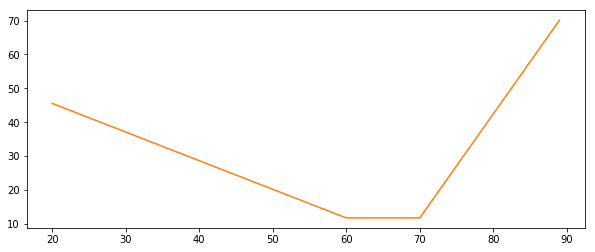

In [24]:
model_fit.plot()

In [18]:
! eemeter caltrack --sample=il-electricity-cdd-only-billing_monthly --output-file=/tmp/out.json

Loading sample: il-electricity-cdd-only-billing_monthly
Output written: /tmp/out.json


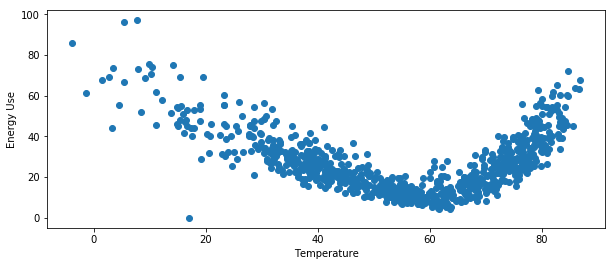

In [25]:
>>> eemeter.plot_energy_signature(meter_data, temperature_data)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1904432390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1904615160>)

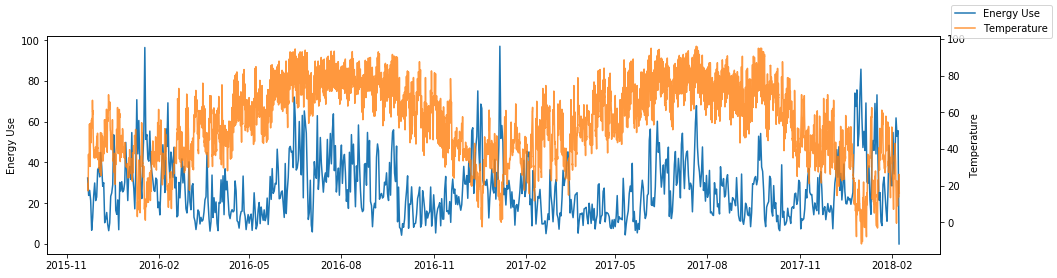

In [26]:
>>> eemeter.plot_time_series(meter_data, temperature_data)

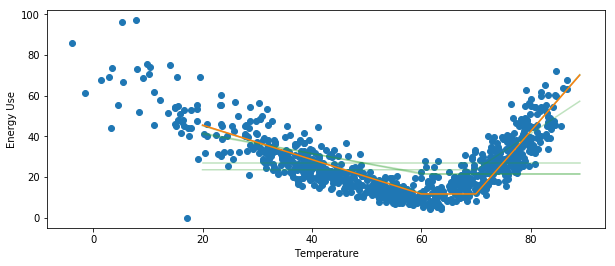

In [27]:
>>> ax = eemeter.plot_energy_signature(meter_data, temperature_data)
>>> model_fit.plot(ax=ax, with_candidates=True)

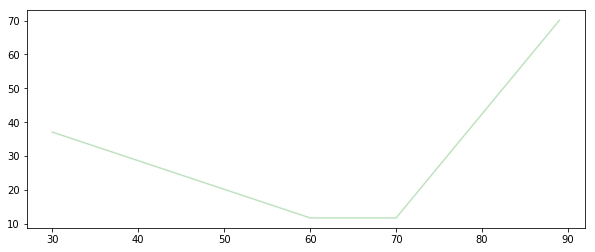

In [33]:
>>> model_fit.model.plot()